In [7]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline


In [8]:
MEAN = [0, 0]
COV = [[10, 8], [8, 10]]
AXIS_LIM = 10
STEP = 0.03

x_grid, y_grid = np.mgrid[-AXIS_LIM:AXIS_LIM:STEP, -AXIS_LIM:AXIS_LIM:STEP]

grid = np.empty(x_grid.shape + (2,))
grid[:, :, 0] = x_grid
grid[:, :, 1] = y_grid

distribution = sps.multivariate_normal(mean=MEAN, cov=COV)
y_distribution = sps.norm(loc=MEAN[1], scale=np.sqrt(COV[1][1]))

def plot_conditional_density(y):
    x_grid = np.arange(-AXIS_LIM, AXIS_LIM, STEP)
    y_grid = [distribution.pdf([x, y]) for x in x_grid] / y_distribution.pdf(y)
    
    plt.plot(x_grid, y_grid, label=r'$f_{\xi_1|\xi_2}(x,' + str(y) + r')$')
    

### График плотности случайного вектора $\xi.$

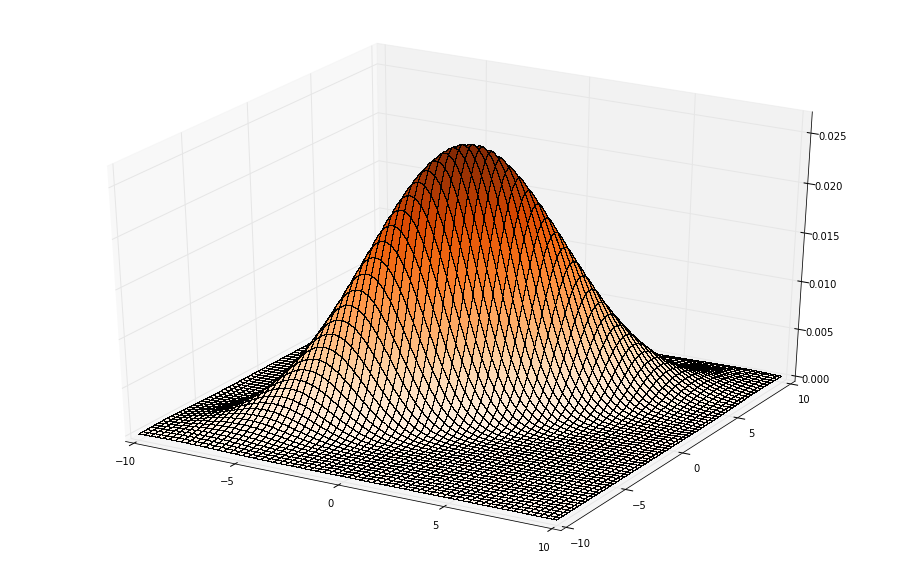

In [9]:
distribution = sps.multivariate_normal(mean=MEAN, cov=COV)
density = distribution.pdf(grid)

fig = plt.figure(figsize=(16, 10))
axes = fig.gca(projection='3d')
surf = axes.plot_surface(x_grid, y_grid, density, cmap='Oranges',
                         linewidth=0.005, antialiased=False)
axes.set_xlim3d(-AXIS_LIM, AXIS_LIM )
axes.set_ylim3d(-AXIS_LIM , AXIS_LIM )
axes.set_zlim3d(0, density.max())
#plt.title('Gaussian density')
plt.show()

### График условной плотности $f_{\xi_1, \xi_2}(x, y)$ для разных значений $y.$

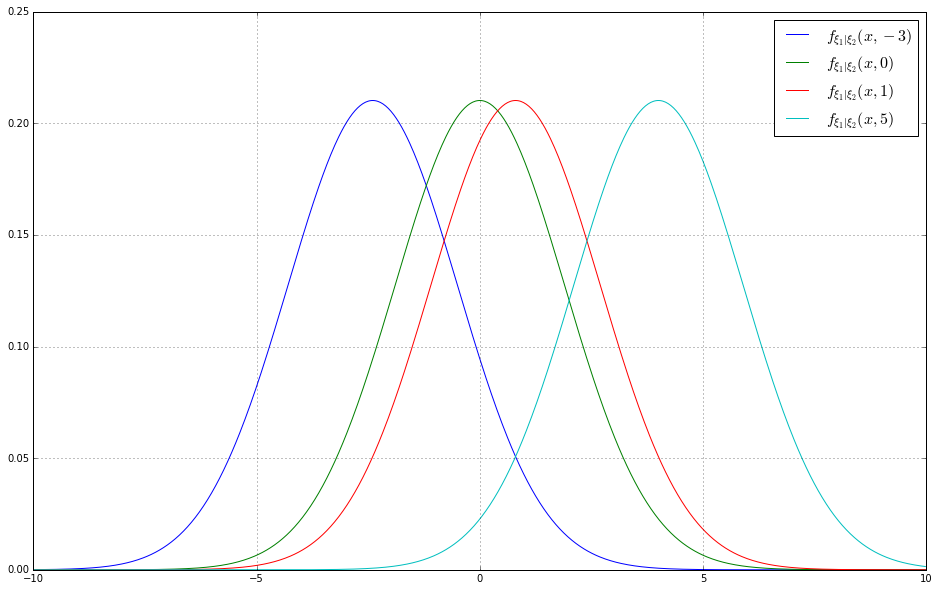

In [10]:
plt.figure(figsize=(16,10))

for y in [-3, 0, 1, 5]:
    plot_conditional_density(y)
    
plt.grid()
plt.legend(fontsize=16)
plt.show()

### График $E(\xi_1|\xi_2 = y).$

Найдём условное мат. ожидание $E(\xi_1|\xi_2=y)$: 

$cov(5\xi_1-4\xi_2, \xi_2)=0$, следовательно, случайные величины $5\xi_1-4\xi_2$ и $\xi_2$ независимы.
Тогда $E(5\xi_1-4\xi_2)=E(5\xi_1-4\xi_2|\xi_2)=5E(\xi_1|\xi_2)-4E(\xi_2|\xi_2)=5E(\xi_1|\xi_2)-4\xi_2$, откуда 
$E(\xi_1|\xi_2)=\frac{4}{5}\xi_2$.   

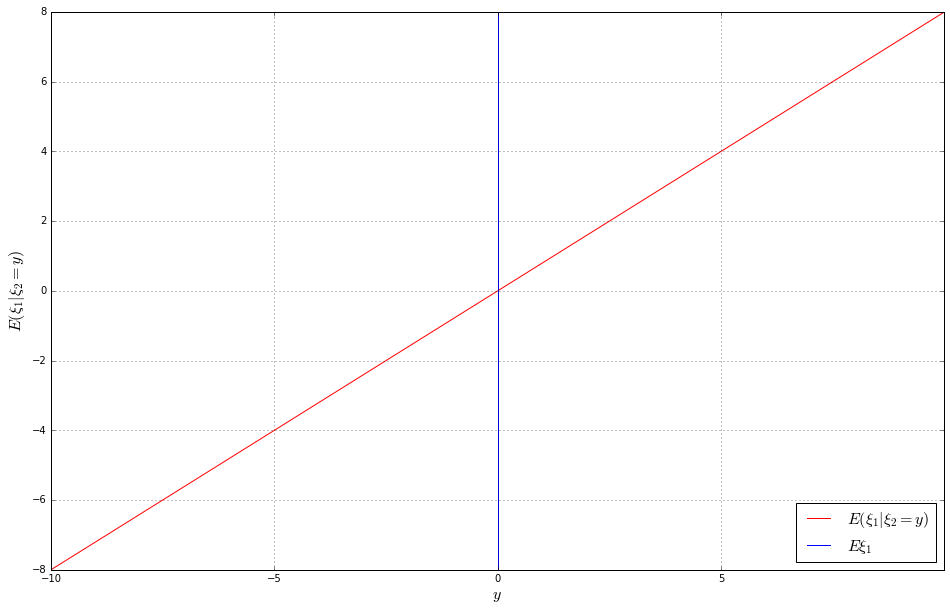

In [15]:
y_grid = np.arange(-AXIS_LIM, AXIS_LIM, STEP)

plt.figure(figsize=(16, 10))
plt.plot(y_grid, (4 / 5) * y_grid, label=r'$E(\xi_1|\xi_2=y)$', color='red')
plt.axvline(x=0, ymin=-AXIS_LIM, ymax = AXIS_LIM, color='blue', label='$E\\xi_1$')
plt.xlim(y_grid.min(), y_grid.max())
plt.xlabel(r'$y$', fontsize=16)
plt.ylabel('$E(\\xi_1|\\xi_2=y)$', fontsize=16)
plt.legend(fontsize=16, loc=4)
plt.grid()
plt.show()